# Car Price Prediction using Linear & Lasso Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics # Used to find accuracy score , error score , etc

Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataFrame
car_data = pd.read_csv("car data.csv")

In [4]:
# First 5 rows and columns
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# Number of rows and columns
car_data.shape

(301, 9)

In [6]:
# Checking the number of missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Getting additional information about the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking the distribution of the categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Text Encoding

In [9]:
car_data.replace({"Fuel_Type":{"Petrol":0 , "Diesel":1 , "CNG":2}},inplace=True)
car_data.replace({"Seller_Type":{"Dealer":0 , "Individual":1}},inplace=True)
car_data.replace({"Transmission":{"Manual":0 , "Automatic":1}},inplace=True)

In [10]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data & Target

In [11]:
X = car_data.drop(['Car_Name',"Selling_Price"],axis=1)
Y = car_data['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting training & test data

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)


Model Training

In [15]:
# Loading the training data with linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
# Prediction on Training data
training_data_pred = lin_reg_model.predict(X_train)

In [17]:
# r squared Error
error_score = metrics.r2_score(Y_train,training_data_pred)

In [18]:
print(error_score)

0.87994516604937


In [19]:
print("R squared error is : ",error_score)

R squared error is :  0.87994516604937


Visualize the actual price and predicted price

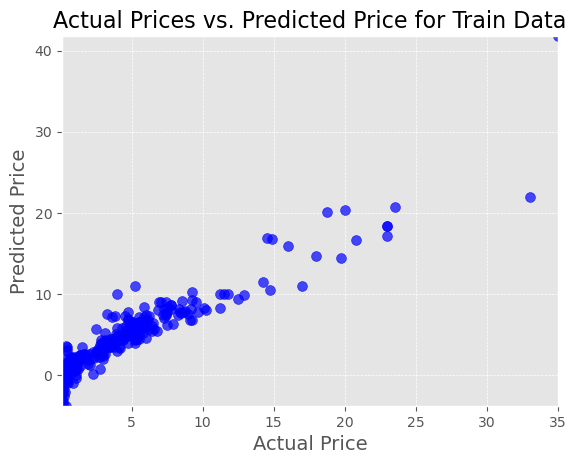

In [29]:
plt.scatter(Y_train, training_data_pred, s=50, c='blue', marker='o', alpha=0.7)  
plt.xlabel("Actual Price", fontsize=14)  
plt.ylabel("Predicted Price", fontsize=14)
plt.title("Actual Prices vs. Predicted Price for Train Data", fontsize=16)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim([min(Y_train), max(Y_train)])  
plt.ylim([min(training_data_pred), max(training_data_pred)]) 
plt.style.use('ggplot')  
plt.show()

In [23]:
# Prediction on Test data
test_data_pred = lin_reg_model.predict(X_test)

In [24]:
# r squared Error
error_score_test = metrics.r2_score(Y_test,test_data_pred)

In [25]:
print("R squared error is : ",error_score_test)

R squared error is :  0.8365766715025409


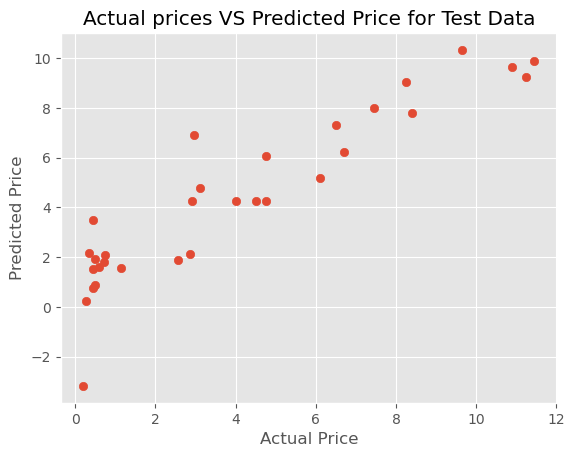

In [28]:
plt.scatter(Y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual prices VS Predicted Price for Test Data")
plt.show()

## Visualization

Distribution of Selling Prices

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


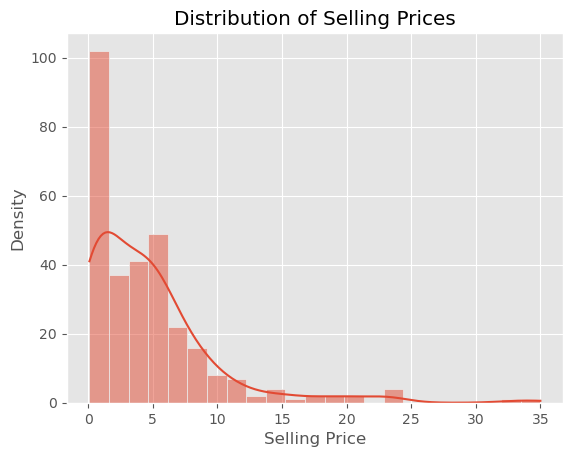

In [32]:
sns.histplot(car_data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.show()

Relationship Between Selling Price and Present Price

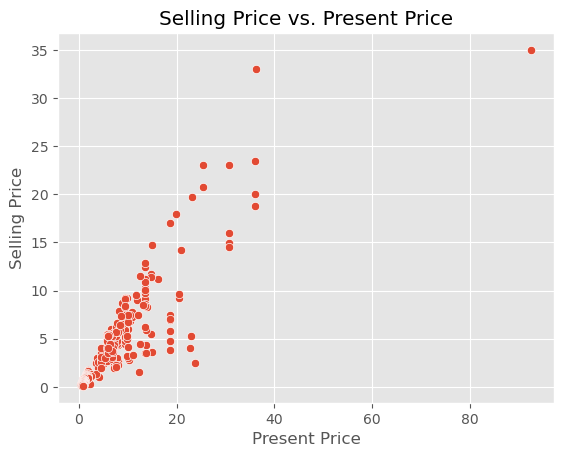

In [33]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

Distribution of Kilometers Driven

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


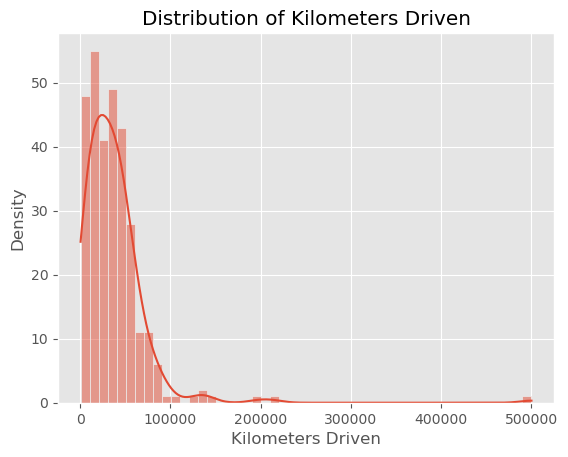

In [34]:
sns.histplot(car_data['Kms_Driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Density')
plt.show()

Comparison of Selling Price by Fuel Type

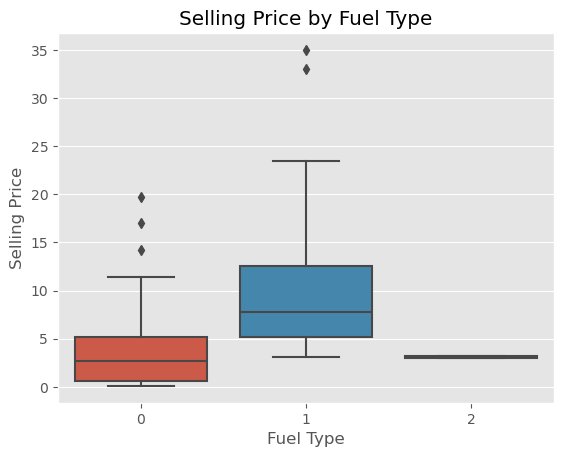

In [35]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

Count of Cars by Seller Type and Transmission

AttributeError: 'numpy.int64' object has no attribute 'startswith'

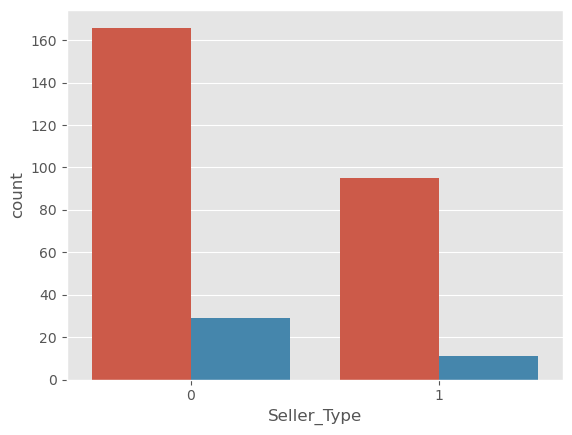

In [37]:
sns.countplot(x='Seller_Type', hue='Transmission', data=car_data)
plt.title('Count of Cars by Seller Type and Transmission')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.legend(title='Transmission')
plt.show()